In [1]:
from matplotlib import patches
from matplotlib import pyplot

import numpy as np
import matplotlib.pyplot as plt
from math import tan, pi

from matplotlib.patches import Ellipse, Polygon

In [2]:
'''
h_couche = [0.4,0.6,0.1] # épaisseur visible de chaque couche
color_couche = ['g','y','brown'] # Couleur de chaque couche
symbol_couche = ['//','o..','-'] # Texture de chaque couche
name_couche = ['Terre \n végétale', 'Remblai \n sablo-graveleux', 'Argile'] # Nom de chaque couche
name_fondation = ['Béton maconné', 'Béton armé'] #Nom de chaque dé de fondation
name_mur = 'Mur' # Nom du mur
Titre = 'Massif isolé' #Titre du document
h_mur = 0.50 # hauteur du mur sous le sol et au-dessus des fondations
d_mur = 0.60 #élévation du mur au-dessus du sol
deb_fond = [0.20,0.40] #débord fondation
h_fond = [0.30,0.40] #hauteur fondation
fond_fouille = 1.1 #profondeur du fond de fouille
cote = 120 # Cote de la fouille
color_fond = ['grey','grey'] #Couleur fondation
symbol_fond = ['-','-'] #Texture fondation
fonte_size = 12 #Taille de police
font = {'weight' : 'bold', 'size' : fonte_size} #Police de texte
font_title = {'weight' : 'bold', 'size' : 20} #Police de titre
font_measure = {'size' : 10} #Police de mesure
'''

"\nh_couche = [0.4,0.6,0.1] # épaisseur visible de chaque couche\ncolor_couche = ['g','y','brown'] # Couleur de chaque couche\nsymbol_couche = ['//','o..','-'] # Texture de chaque couche\nname_couche = ['Terre \n végétale', 'Remblai \n sablo-graveleux', 'Argile'] # Nom de chaque couche\nname_fondation = ['Béton maconné', 'Béton armé'] #Nom de chaque dé de fondation\nname_mur = 'Mur' # Nom du mur\nTitre = 'Massif isolé' #Titre du document\nh_mur = 0.50 # hauteur du mur sous le sol et au-dessus des fondations\nd_mur = 0.60 #élévation du mur au-dessus du sol\ndeb_fond = [0.20,0.40] #débord fondation\nh_fond = [0.30,0.40] #hauteur fondation\nfond_fouille = 1.1 #profondeur du fond de fouille\ncote = 120 # Cote de la fouille\ncolor_fond = ['grey','grey'] #Couleur fondation\nsymbol_fond = ['-','-'] #Texture fondation\nfonte_size = 12 #Taille de police\nfont = {'weight' : 'bold', 'size' : fonte_size} #Police de texte\nfont_title = {'weight' : 'bold', 'size' : 20} #Police de titre\nfont_measure

In [3]:
fichier = open("input.txt", "r")
all_lines = fichier.readlines()

In [4]:
h_couche = eval(all_lines[4].split('\t')[0])
color_couche = eval(all_lines[5].split('\t')[0])
symbol_couche = eval(all_lines[6].split('\t')[0])
name_couche = eval(all_lines[7].split('\t')[0])
name_fondation = eval(all_lines[8].split('\t')[0])
name_mur = eval(all_lines[9].split('\t')[0])
Titre = eval(all_lines[10].split('\t')[0])
h_mur = eval(all_lines[11].split('\t')[0])
d_mur = eval(all_lines[12].split('\t')[0])
deb_fond = eval(all_lines[13].split('\t')[0])
h_fond = eval(all_lines[14].split('\t')[0])
fond_fouille = eval(all_lines[15].split('\t')[0])
cote = eval(all_lines[16].split('\t')[0])
color_fond = eval(all_lines[17].split('\t')[0])
symbol_fond = eval(all_lines[18].split('\t')[0])
font = eval(all_lines[19].split('\t')[0])
font_title = eval(all_lines[20].split('\t')[0])
font_measure = eval(all_lines[21].split('\t')[0])

In [5]:
def plot_foundation(Titre, cote, h_couche,color_couche, symbol_couche, name_couche, name_fondation, d_mur, h_mur, name_mur, deb_fond,h_fond, fond_fouille, color_fond,symbol_fond,font,font_title,font_measure):
    fig = plt.figure()
    fig.set_figheight(13)
    fig.set_figwidth(13)

    axs = fig.subplot_mosaic([['patches']])
    em = 0.7 # plus joli, épaisseur du mur sur le schéma et à la foi largeur du terrain à droite
    x_fond = 0.6 #largeur du trou, laisser de la place pour les annotations
    alpha = 60 #angle de pente en degrés
    x_pente = np.sum(h_couche)/tan(alpha*pi/180)
    font_size = font['size']
    
    for i in range(0,len(h_couche)):
        
        x1 = h_couche[i]/tan(alpha*pi/180)
        
        if i==0:
            x1_c = em+np.sum(deb_fond)+x_fond+x_pente
            y1_c = 0
            x2_c = 2*em+np.sum(deb_fond)+x_fond+x_pente
            y2_c = 0
            x3_c = 2*em+np.sum(deb_fond)+x_fond+x_pente
            y3_c = -h_couche[i]
            x4_c = em+np.sum(deb_fond)+x_fond - x1 + x_pente
            y4_c = -h_couche[i]
            x_display = 0.99*x3_c
            plt.annotate(text='', xy=(x4_c,y4_c), xytext=(x4_c,y1_c), arrowprops=dict(arrowstyle='<->',relpos=(0,0)), annotation_clip=False)
 
        else:
            x1_c = x4_c
            y1_c = y4_c
            x2_c = x3_c
            y2_c = y3_c
            x3_c = x2_c
            y3_c = -np.sum(h_couche[0:i+1])
            x4_c = x4_c - x1
            y4_c = -np.sum(h_couche[0:i+1])
            plt.annotate(text='', xy=(x4_c,y4_c), xytext=(x4_c,y1_c), arrowprops=dict(arrowstyle='<->',relpos=(0,0)), annotation_clip=False)
          
        axs['patches'].annotate(f'{format(float(h_couche[i]),".2f")} ', xy=(x4_c,y4_c), xycoords='data',
            xytext=(x4_c,(y1_c+y4_c)/2+0.02), textcoords='data',
            ha="right", va="top",**font_measure) 
        
        axs['patches'].add_patch(Polygon([(x1_c, y1_c), (x2_c, y2_c), (x3_c, y3_c),(x4_c,y4_c)],
            hatch=symbol_couche[i], facecolor=color_couche[i],edgecolor = 'Black'))
        

        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
        arrow_args = dict(arrowstyle="->")
        
        if i<len(h_couche)-1 or h_couche[len(h_couche)-1]>0.15:
        
            y_display =  (y3_c + y2_c + ((name_couche[i].count('\n')+1)*font_size/120))/2 - 0.02 ################
            axs['patches'].annotate(f'{name_couche[i]}', xy=(x_display, y_display), xycoords='data', 
                 xytext=(x_display, y_display), textcoords='data',
                 ha="right", va="top",
                 bbox=bbox_props, **font,
                 arrowprops=arrow_args) 

    #Dernière couche
    x1_c = 0
    y1_c = y4_c
    x2_c = x3_c
    y2_c = y3_c
    x3_c = x2_c
    y3_c = -(np.sum(h_couche)+0.3)
    x4_c = 0
    y4_c = -(np.sum(h_couche)+0.3)
    
    axs['patches'].add_patch(Polygon([(x1_c, y1_c), (x2_c, y2_c), (x3_c, y3_c),(x4_c,y4_c)],
            hatch=symbol_couche[i], facecolor=color_couche[i],edgecolor = 'Black'))
    
    if h_couche[len(h_couche)-1]<0.15:
        y_display = (y3_c + y2_c + ((name_couche[i].count('\n')+1)*font_size/120))/2 - 0.02
        axs['patches'].annotate(f'{name_couche[i]}', xy=(x_display, y_display), xycoords='data',
            xytext=(x_display, y_display), textcoords='data',
            ha="right", va="top",
            bbox=bbox_props, **font,
            arrowprops=arrow_args) 
    
    #Le mur
    x1_mur = 0
    y1_mur = d_mur
    x2_mur = em
    y2_mur = d_mur
    x3_mur = em
    y3_mur = -h_mur
    x4_mur = 0
    y4_mur = -h_mur
    axs['patches'].add_patch(Polygon([(x1_mur, y1_mur), (x2_mur, y2_mur), (x3_mur, y3_mur),(x4_mur,y4_mur)],
            hatch='|-', facecolor='grey',edgecolor = 'black'))
    
    x_display2 = x1_mur+0.03
    
    y_display2 = (y3_mur + y2_mur + ((name_mur.count('\n')+1)*font_size/120))/2 - 0.02
    axs['patches'].annotate(f'{name_mur}', xy=(x_display2, y_display2), xycoords='data', 
            xytext=(x_display2, y_display2), textcoords='data',
            ha="left", va="top",
            bbox=bbox_props, **font,
            arrowprops=arrow_args) 
    
    plt.annotate(text='', xy=(x2_mur+0.04,0), xytext=(x3_mur+0.04,y3_mur), arrowprops=dict(arrowstyle='<->',relpos=(0,0)), annotation_clip=False)
    
    axs['patches'].annotate(f'{format(h_mur,".2f")} ', xy=(x2_mur+0.06,y4_mur), xycoords='data',
        xytext=(x2_mur+0.06,(0+y4_mur)/2+0.02), textcoords='data',
        ha="left", va="top",**font_measure) 
    
    for i in range(0,len(h_fond)):
        if i==0:
            x1_fond = x1_mur
            y1_fond = -h_mur
            x2_fond = x2_mur + deb_fond[i]
            y2_fond = y4_mur
            x3_fond = x2_mur + deb_fond[i]
            y3_fond = -(h_mur + h_fond[i])
            x4_fond = 0
            y4_fond = -(h_mur + h_fond[i])
            
        else:
            x1_fond = 0
            y1_fond = -(h_mur+np.sum(h_fond[0:i]))
            x2_fond = x2_mur + np.sum(deb_fond[0:i+1])#deb1 + deb2
            y2_fond = -(h_mur+np.sum(h_fond[0:i]))
            x3_fond = x2_mur + np.sum(deb_fond[0:i+1])
            y3_fond = -(h_mur+np.sum(h_fond[0:i+1]))
            x4_fond = 0
            y4_fond = -(h_mur+np.sum(h_fond[0:i+1]))
            
        axs['patches'].add_patch(Polygon([(x1_fond, y1_fond), (x2_fond, y2_fond), (x3_fond, y3_fond),(x4_fond,y4_fond)],
            hatch=symbol_fond[i], facecolor=color_fond[i],edgecolor = 'black'))
        
        y_display2 = (y3_fond + y2_fond + ((name_fondation[i].count('\n')+1)*font_size/120))/2 - 0.02
        axs['patches'].annotate(f'{name_fondation[i]}', xy=(x_display2, y_display2), xycoords='data', 
            xytext=(x_display2, y_display2), textcoords='data',
            ha="left", va="top",
            bbox=bbox_props, **font,
            arrowprops=arrow_args) 
        
        plt.annotate(text='', xy=(x2_fond+0.04,y2_fond), xytext=(x3_fond+0.04,y3_fond), arrowprops=dict(arrowstyle='<->',relpos=(0,0)), annotation_clip=False)
        
        axs['patches'].annotate(f'{format(h_fond[i],".2f")} ', xy=(x2_fond+0.06,y4_fond), xycoords='data',
        xytext=(x2_fond+0.06,(y2_fond+y4_fond)/2+0.02), textcoords='data',
        ha="left", va="top",**font_measure) 
        
        plt.annotate(text='', xy=(x2_mur + np.sum(deb_fond[0:i]) ,y1_fond+0.02), xytext=(x2_fond,y1_fond+0.02), arrowprops=dict(arrowstyle='<->',relpos=(0,0)), annotation_clip=False)
        
        axs['patches'].annotate(f'{format(deb_fond[i],".2f")} ', xy=((x2_fond+ np.sum(deb_fond[0:i])+ x2_mur)/2+0.02,y1_fond-0.02), xycoords='data',
        xytext=((x2_fond+np.sum(deb_fond[0:i])+x2_mur)/2-0.02,y1_fond+0.03), textcoords='data',
        ha="left", va="bottom",**font_measure) 
        

    plt.annotate(text='', xy=(em+np.sum(deb_fond)+x_fond/2,0), xytext=(em+np.sum(deb_fond)+x_fond/2,-fond_fouille), arrowprops=dict(arrowstyle='<->',relpos=(0,0)), annotation_clip=False)
    
    axs['patches'].annotate(f'{format(fond_fouille,".2f")} ', xy=((em+np.sum(deb_fond)+x_fond/2)+0.06,-fond_fouille/2+0.02), xycoords='data',
    xytext=((em+np.sum(deb_fond)+x_fond/2)-0.02,-fond_fouille/2+0.02), textcoords='data',
    ha="right", va="top",**font_measure) 
    
    axs['patches'].annotate(f'{Titre}', xy=(x3_c/2, 3*d_mur/4), xycoords='data', 
        xytext=(0.4*x3_c, 3*d_mur/4), textcoords='data',
        ha="left", va="top",
        bbox=bbox_props, **font_title,
        arrowprops=arrow_args)
    
    axs['patches'].annotate(f'Cote {format(cote,".2f")} ', xy=(1.3*
                                                               em+np.sum(deb_fond)+x_fond+x_pente,0.03), xycoords='data',
        xytext=(1.3*em+np.sum(deb_fond)+x_fond+x_pente,0.03), textcoords='data',
        ha="left", va="bottom",**font_measure) 
        
       
    axs['patches'].set_xlim([0, x3_c])
    axs['patches'].set_ylim([-(np.sum(h_couche)+0.3), d_mur])
    axs['patches'].set_aspect(1)
    axs['patches'].set_yticks(np.arange(-(np.sum(h_couche)+0.3), d_mur, 0.2), fontweight='bold')
    axs['patches'].axis('off') #: supprime les axes (graduations et boîte)

    plt.show()
        

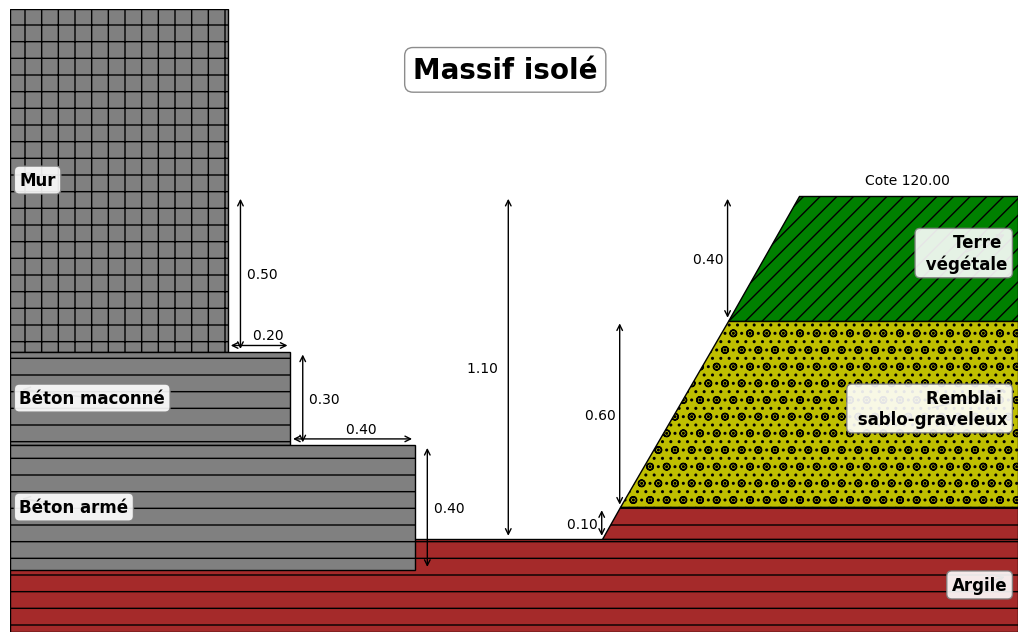

In [6]:
plot_foundation(Titre, cote, h_couche,color_couche, symbol_couche, name_couche, name_fondation, d_mur, h_mur, name_mur, deb_fond,h_fond,fond_fouille, color_fond,symbol_fond,font,font_title,font_measure)